In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
df = pd.read_csv('./data/BankChurners.csv')

In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [5]:
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
'CLIENTNUM',], axis=1, inplace=True)
df.head(3)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


In [6]:
df.drop(['Dependent_count','Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',	'Contacts_Count_12_mon'	,'Credit_Limit',	'Total_Revolving_Bal',	'Avg_Open_To_Buy'	,'Total_Amt_Chng_Q4_Q1'	,'Total_Trans_Amt'	,'Total_Trans_Ct'	,'Total_Ct_Chng_Q4_Q1',	'Avg_Utilization_Ratio'
], axis=1, inplace=True)
df.head(3)

,Attrition_Flag,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,45,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,49,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,51,M,Graduate,Married,$80K - $120K,Blue


In [7]:
input = df.drop(['Income_Category'], axis='columns')
target = df['Income_Category']

In [8]:
input

,Attrition_Flag,Customer_Age,Gender,Education_Level,Marital_Status,Card_Category
0,Existing Customer,45,M,High School,Married,Blue
1,Existing Customer,49,F,Graduate,Single,Blue
2,Existing Customer,51,M,Graduate,Married,Blue
3,Existing Customer,40,F,High School,Unknown,Blue
4,Existing Customer,40,M,Uneducated,Married,Blue
...,...,...,...,...,...,...
10122,Existing Customer,50,M,Graduate,Single,Blue
10123,Attrited Customer,41,M,Unknown,Divorced,Blue
10124,Attrited Customer,44,F,High School,Married,Blue
10125,Attrited Customer,30,M,Graduate,Unknown,Blue


In [9]:
target

0           $60K - $80K
1        Less than $40K
2          $80K - $120K
3        Less than $40K
4           $60K - $80K
              ...      
10122       $40K - $60K
10123       $40K - $60K
10124    Less than $40K
10125       $40K - $60K
10126    Less than $40K
Name: Income_Category, Length: 10127, dtype: object

## Decision Tree

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le_Attrition_Flag	=LabelEncoder()
# le_Customer_Age=LabelEncoder()
# le_Gender=LabelEncoder()
le_Education_Level=LabelEncoder()
le_Marital_Status=LabelEncoder()
le_Income_Category=LabelEncoder()
le_Card_Category=LabelEncoder()

mentranposr beberapa atribut untuk mencoba transformasi

In [12]:
input['Attrition_Flag_n'] = le_Attrition_Flag.fit_transform(input['Attrition_Flag'])
# input['Customer_Age_n'] = le_Customer_Age.fit_transform(input['Customer_Age'])
input['Education_Level_n'] = le_Education_Level.fit_transform(input['Education_Level'])
input['Marital_Status_n'] = le_Marital_Status.fit_transform(input['Marital_Status'])
input['Card_Category_n'] = le_Card_Category.fit_transform(input['Card_Category'])
input.head(3)

,Attrition_Flag,Customer_Age,Gender,Education_Level,Marital_Status,Card_Category,Attrition_Flag_n,Education_Level_n,Marital_Status_n,Card_Category_n
0,Existing Customer,45,M,High School,Married,Blue,1,3,1,0
1,Existing Customer,49,F,Graduate,Single,Blue,1,2,2,0
2,Existing Customer,51,M,Graduate,Married,Blue,1,2,1,0


In [13]:
input_n = input.drop(['Attrition_Flag','Education_Level','Marital_Status','Card_Category', 'Customer_Age', 'Gender'], axis='columns')
input_n

,Attrition_Flag_n,Education_Level_n,Marital_Status_n,Card_Category_n
0,1,3,1,0
1,1,2,2,0
2,1,2,1,0
3,1,3,3,0
4,1,5,1,0
...,...,...,...,...
10122,1,2,2,0
10123,0,6,0,0
10124,0,3,1,0
10125,0,2,3,0


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [49]:
x_train, x_test, y_train, y_test = train_test_split(input_n, target, test_size=0.4, random_state=10127)
tree_data = DecisionTreeClassifier( random_state=10127)
tree_data.fit(x_train, y_train)

DecisionTreeClassifier(random_state=10127)

In [50]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=4)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

## Visualisasi

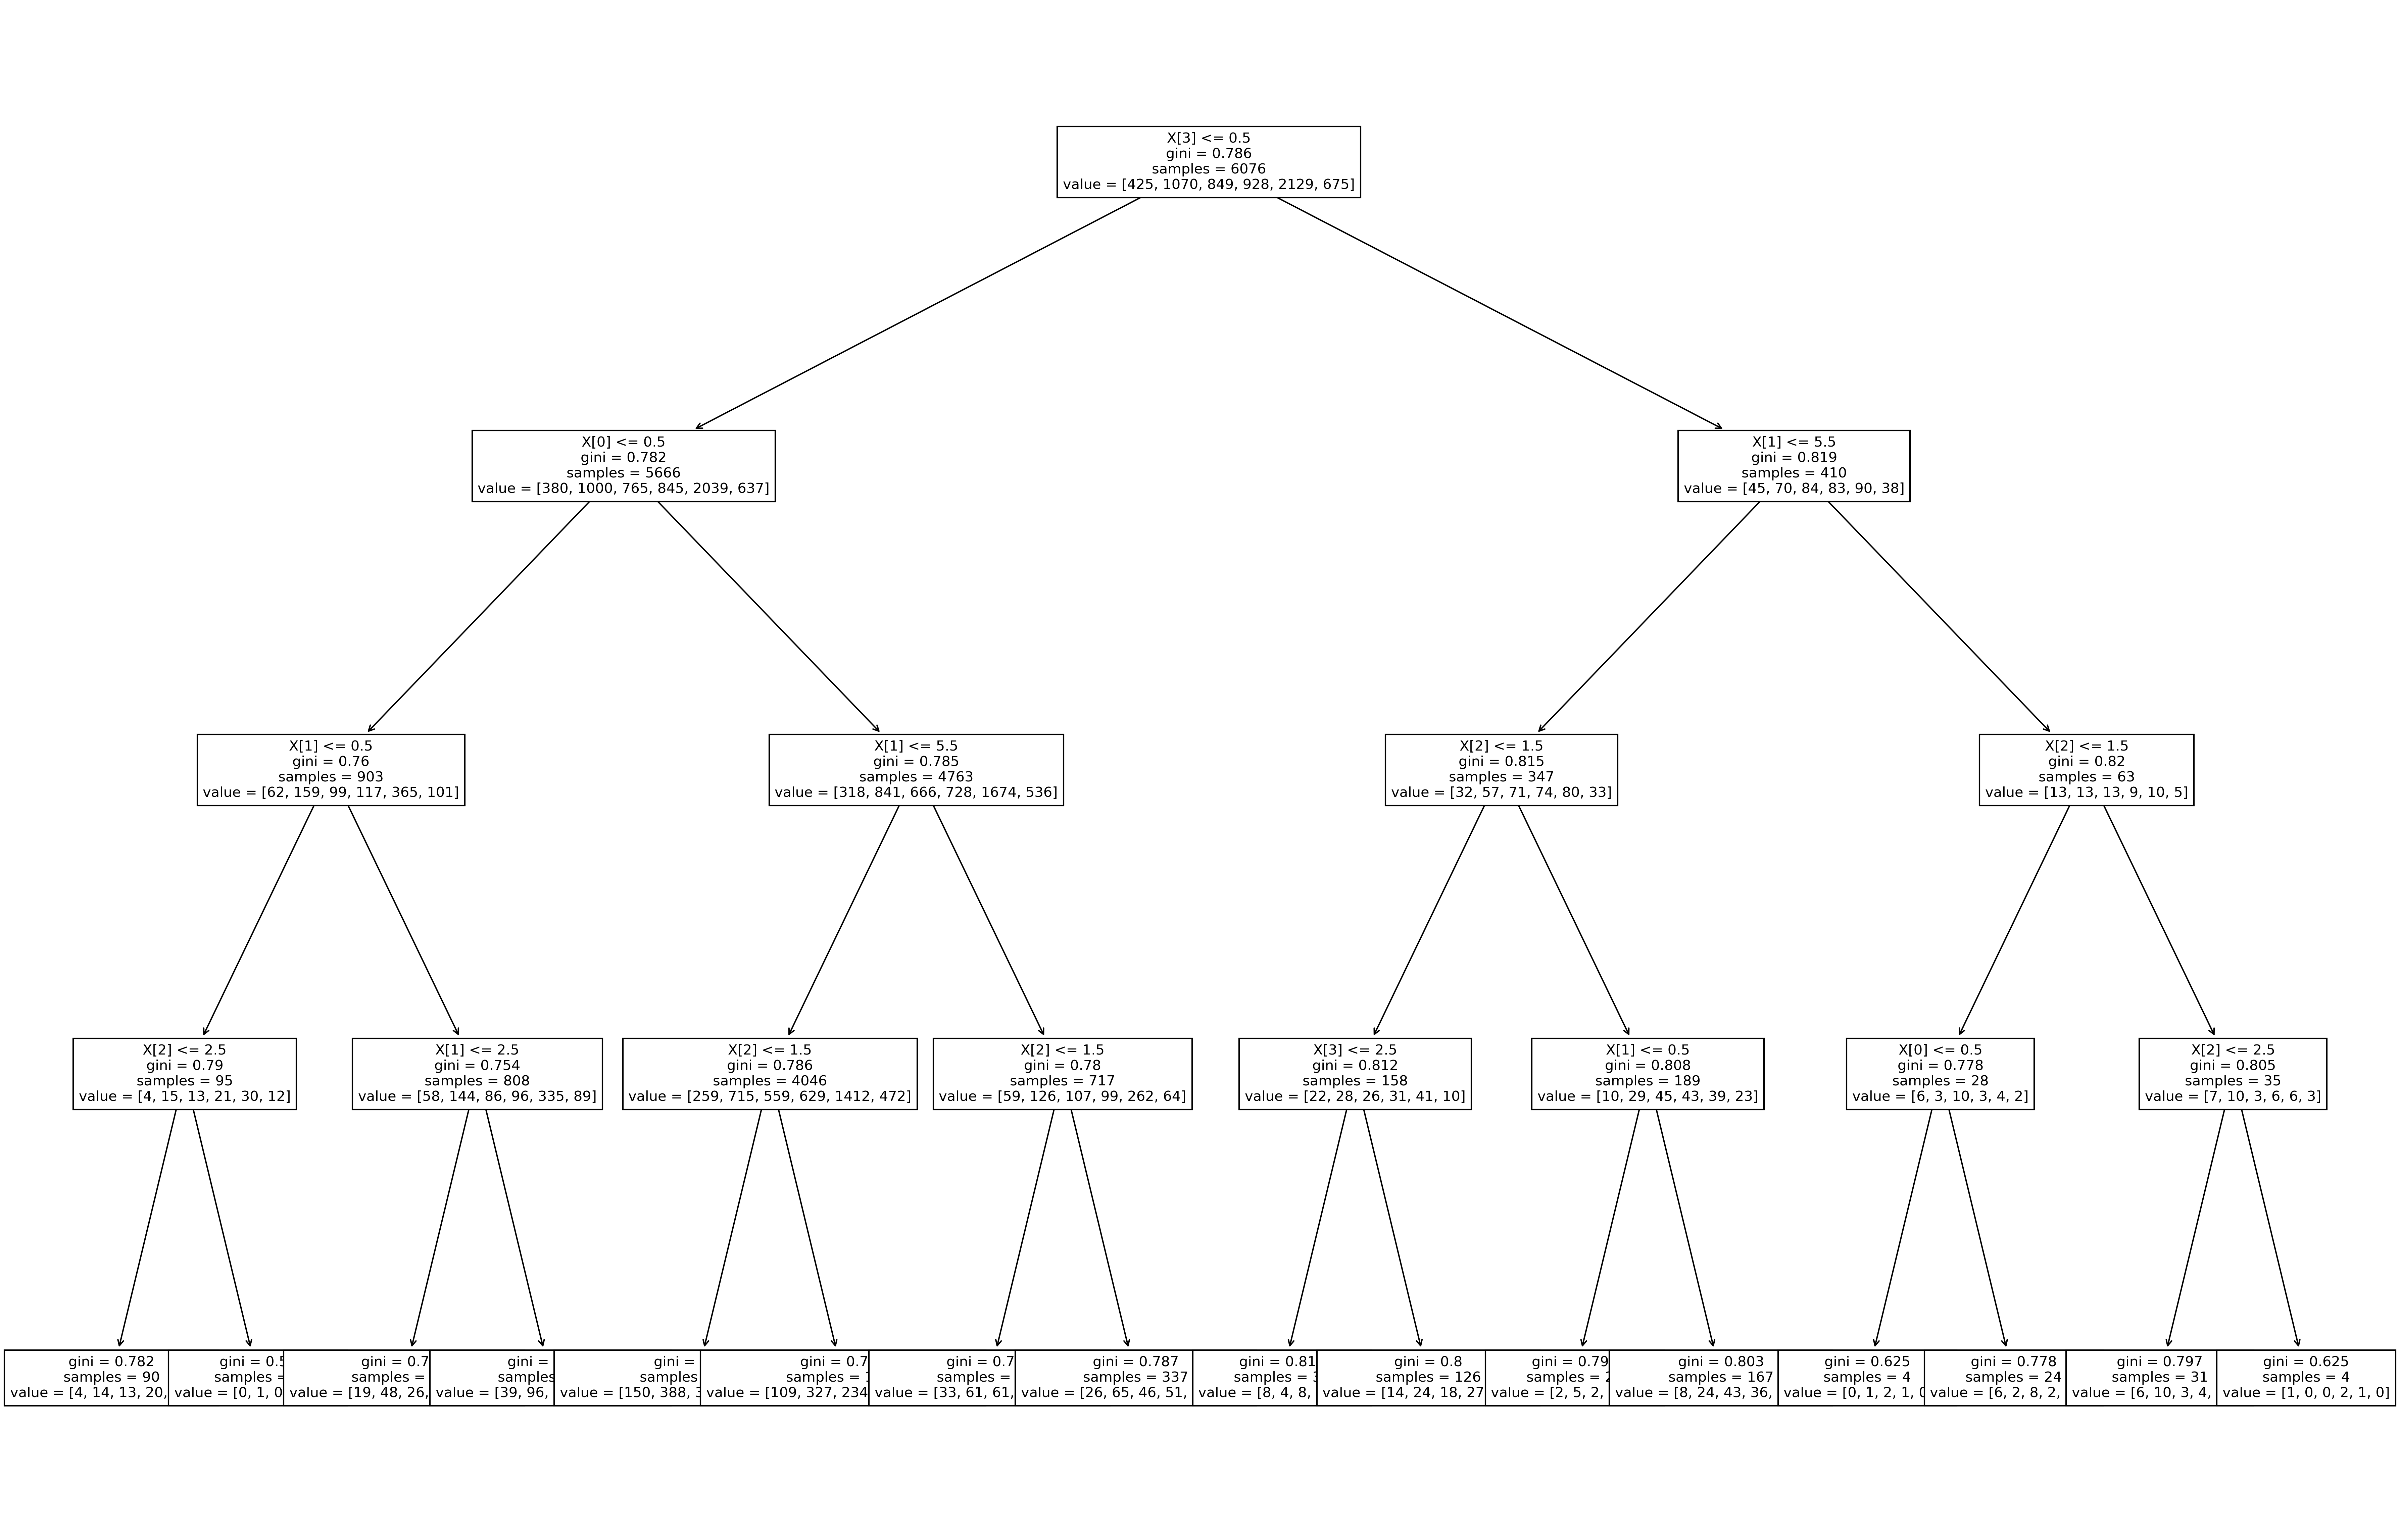

In [45]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.rcParams['figure.dpi'] = 300
plt.subplots(figsize=(30, 20))
tree.plot_tree(model, fontsize=10)
plt.show()

## Evaluasi Model

In [58]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

       $120K +       0.00      0.00      0.00       302
   $40K - $60K       0.30      0.00      0.01       720
   $60K - $80K       0.38      0.01      0.02       553
  $80K - $120K       0.33      0.03      0.06       607
Less than $40K       0.36      0.99      0.52      1432
       Unknown       0.00      0.00      0.00       437

      accuracy                           0.36      4051
     macro avg       0.23      0.17      0.10      4051
  weighted avg       0.28      0.36      0.20      4051



d:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

print(f'Accuracy: {model.score(x_test, y_test)}')

Accuracy: 0.35670204887682055


In [64]:
from sklearn import tree
model.score(input_n,target)

# Prediksi Model
model.predict([[1	,2	,2	,0]])

d:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Less than $40K'], dtype=object)

## KNN

## Naive Bayes